### Microparticle detection and tracking

This notebook presents the steps to detect the Silica particle and extract the coordinates

A brief summary of the organization of this notebook:

### Summary

- [1 - Packages and imports](#1)

- [2 - Load single image as example](#2)

- [3 - Pre-processing](#3)

- [4 - Image masks, detection of contours and minimum area circles](#4)

<a name='1'></a> 
### 1. Packages and imports

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

<a name='2'></a> 
### 2. Load single image as example

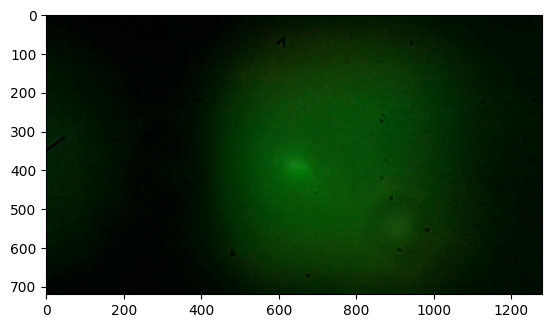

In [89]:
image = '../data/images/frame643.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()

<a name='3'></a> 
### 3. Pre-processing

In [105]:
def increase_contrast(img):
    '''Increase contrast in image making the particle easier to be detected
    
    :param img: Original image
    :type path: np.ndarray
    :return enhanced_img: Image with increased contrast
    :rtype enhanced_img: np.ndarray
    '''
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_channel, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=0.005, tileGridSize=(8,8))
    cl = clahe.apply(l_channel)
    limg = cv2.merge((cl,a,b))
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced_img

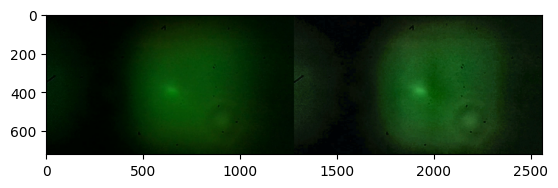

In [106]:
contrast = increase_contrast(img)
contrast = increase_contrast(contrast)
plt.imshow(np.hstack((img, contrast)))
plt.show()

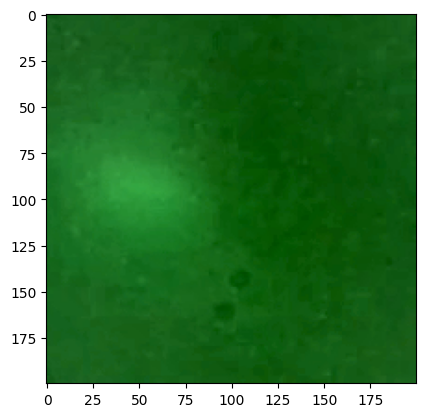

In [107]:
plt.imshow(contrast[300:500, 600:800])
plt.show()

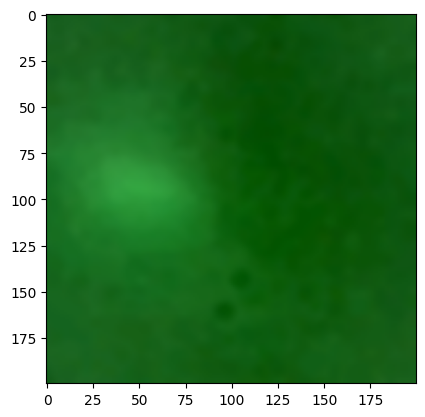

In [108]:
cropped = contrast[300:500, 600:800]
for i in range(1):
    cropped = cv2.medianBlur(cropped, 5)
    cropped = cv2.GaussianBlur(cropped, (5,5),cv2.BORDER_DEFAULT)
plt.imshow(cropped)
plt.show()

<a name='4'></a> 
### 4. Image masks, detection of contours and minimum area circles]

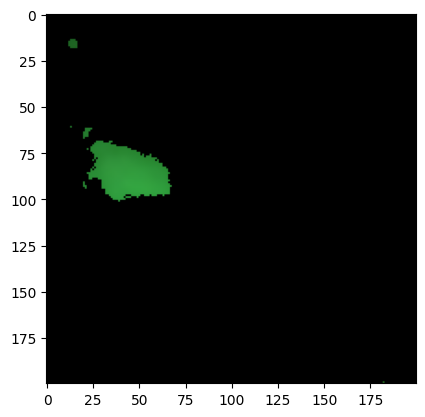

In [118]:
cropped_hsv = cv2.cvtColor(cropped, cv2.COLOR_RGB2HSV)
lower_orange = np.array([10, 10, 10]) # hsv color space
upper_orange = np.array([230, 212, 235]) # hsv color space
orange_mask = cv2.inRange(cropped_hsv, lower_orange, upper_orange)
res = cv2.bitwise_and(cropped, cropped, mask = orange_mask)
plt.imshow(res)
plt.show()

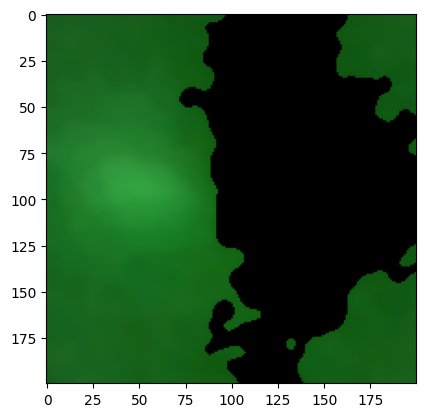

In [113]:
for i in range(5):
    res = cv2.medianBlur(res, 5)
plt.imshow(res)
plt.show()

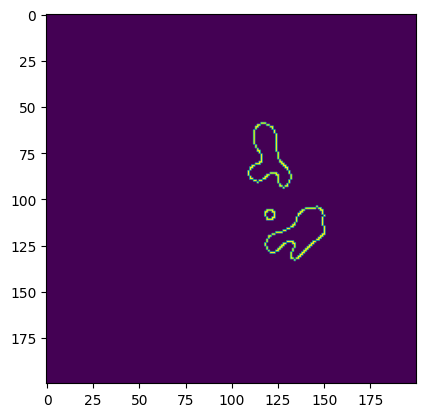

In [111]:
plt.imshow(cv2.Canny(res, 100, 200))
plt.show()

In [84]:
contours, _ = cv2.findContours(cv2.Canny(res, 100, 200),  cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [87]:
cropped = contrast[300:500, 600:800]
for contour in contours:
    (x,y),radius = cv2.minEnclosingCircle(contour)
    print(x,y,radius)
    if 10<radius<15 and 20<x<120 and 20<y<120:        
        break
start = int(x)-int(radius),int(y)-int(radius)
end = int(x)+int(radius),int(y)+int(radius)
color = (255, 0, 0)
thickness = 1
cv2.rectangle(cropped, start, end, color, thickness)
pass

75.12754821777344 85.58163452148438 13.8512601852417


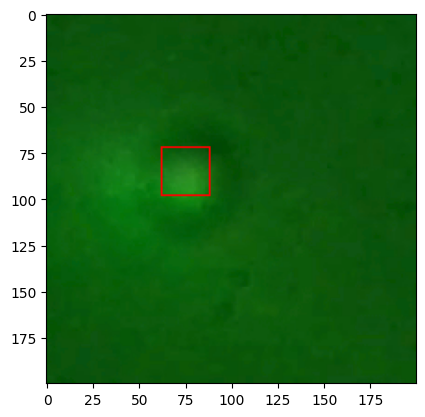

In [88]:
plt.imshow(cropped)
plt.show()

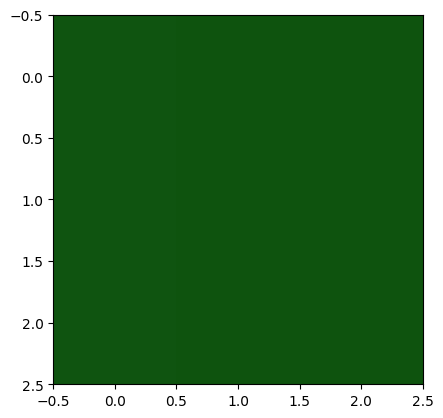

In [48]:
plt.imshow(cropped[start[1]+1:end[1],start[0]+1:end[0]])
plt.show()

In [49]:
sphere = cropped[start[1]+1:end[1],start[0]+1:end[0]]
def pixel_brightness(pixel):
    assert 3 == len(pixel)
    r, g, b = pixel
    return np.sqrt(0.299 * r ** 2 + 0.587 * g ** 2 + 0.114 * b ** 2)

brigthness = np.zeros(sphere.shape[:2])
for i, row in enumerate(sphere):
    for j, pixel in enumerate(row):
        brigthness[i,j] = pixel_brightness(pixel)

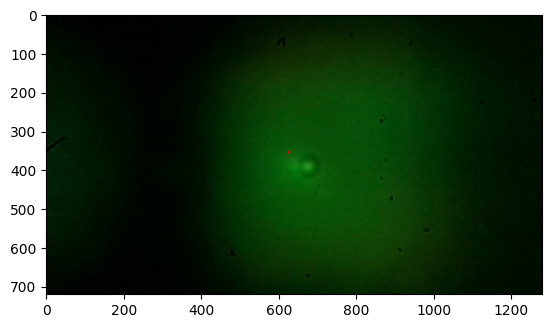

In [50]:
start = (600+int(x)-int(radius),300+int(y)-int(radius))
end = (600+int(x)+int(radius),300+int(y)+int(radius))
color = (255, 0, 0)

thickness = 4
cv2.rectangle(img, start, end, color, thickness)
plt.imshow(img)
plt.show()